In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier as KNC

In [2]:
data=pd.read_csv("Datasets/Zoo.csv")
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


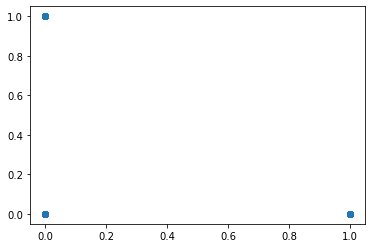

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data['feathers'],data['hair'])

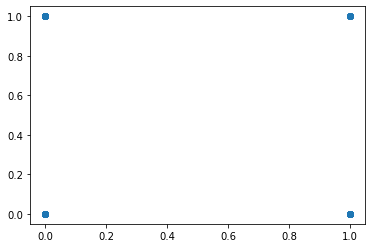

In [6]:
plt.scatter(data['aquatic'],data['milk'])

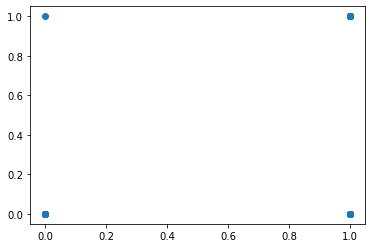

In [7]:
plt.scatter(data['toothed'],data['milk'])

In [5]:
KNN=KNC(n_neighbors=3)
KNN.fit(data.iloc[:,1:16],data.iloc[:,17])

KNeighborsClassifier(n_neighbors=3)

In [7]:
KNN.predict(data.iloc[:,1:16])

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 4, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [9]:
Accuracy=np.mean(KNN.predict(data.iloc[:,1:16])==data.iloc[:,17])
Accuracy

0.9900990099009901

In [14]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(3,50,2):
    KNN=KNC(n_neighbors=i)
    KNN.fit(data.iloc[:,1:16],data.iloc[:,17])
    Accuracy=np.mean(KNN.predict(data.iloc[:,1:16])==data.iloc[:,17])
    acc.append([Accuracy])


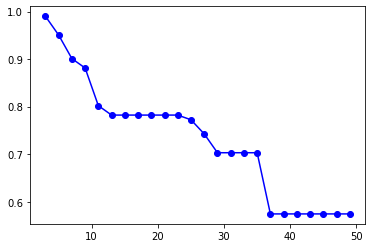

In [11]:
import matplotlib.pyplot as plt
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"bo-")

In [12]:
print(acc)

[[0.9900990099009901], [0.9504950495049505], [0.900990099009901], [0.8811881188118812], [0.801980198019802], [0.7821782178217822], [0.7821782178217822], [0.7821782178217822], [0.7821782178217822], [0.7821782178217822], [0.7821782178217822], [0.7722772277227723], [0.7425742574257426], [0.7029702970297029], [0.7029702970297029], [0.7029702970297029], [0.7029702970297029], [0.5742574257425742], [0.5742574257425742], [0.5742574257425742], [0.5742574257425742], [0.5742574257425742], [0.5742574257425742], [0.5742574257425742]]


In [16]:
# Train Test 

from sklearn.model_selection import train_test_split
x=data.iloc[:,1:16]
y=data.iloc[:,17]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
KNN=KNC(n_neighbors=3)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
KNN.predict(x_train)

array([3, 1, 2, 1, 1, 1, 2, 4, 3, 4, 3, 3, 1, 6, 1, 4, 2, 1, 1, 1, 4, 6,
       2, 1, 7, 1, 6, 4, 1, 4, 2, 1, 4, 1, 1, 2, 1, 2, 5, 1, 1, 1, 2, 2,
       7, 1, 1, 7, 3, 1, 1, 1, 1, 7, 1, 2, 2, 6, 7, 5, 2, 7, 7, 6, 1, 2,
       4, 5, 6, 1, 2, 1, 2, 2, 1, 6, 1, 1, 1, 1], dtype=int64)

In [19]:
Accuracy=np.mean(KNN.predict(x_train)==y_train)
Accuracy

0.9875

In [20]:
Accuracy=np.mean(KNN.predict(x_test)==y_test)
Accuracy

1.0

In [21]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(3,50,2):
    KNN=KNC(n_neighbors=i)
    KNN.fit(x_train,y_train)
    Accuracy_train=np.mean(KNN.predict(x_train)==y_train)
    Accuracy_test=np.mean(KNN.predict(x_test)==y_test)
    acc.append([Accuracy_train,Accuracy_test])

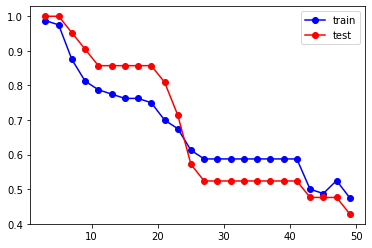

In [24]:
# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"bo-")

# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"ro-")

plt.legend(["train","test"])